In [1]:
# 导入必要的库
from bat.log_to_dataframe import LogToDataFrame
from bat.utils import plot_utils

# 设置默认绘图环境
import matplotlib.pyplot as plt
plot_utils.plot_defaults()

In [2]:
# 读取日志文件
conn_df = LogToDataFrame('mylog/conn.log')

# 数目
conn_df.shape[0]

Successfully monitoring D:/Study/A/ns-0x12/mylog/conn.log...


1004

In [3]:
# 列字段、类型
conn_df.dtypes

conn_state                 object
duration          timedelta64[ns]
history                    object
id.orig_h                  object
id.orig_p                   int64
id.resp_h                  object
id.resp_p                   int64
local_orig                   bool
local_resp                   bool
missed_bytes                int64
orig_bytes                  int64
orig_ip_bytes               int64
orig_pkts                   int64
proto                      object
resp_bytes                  int64
resp_ip_bytes               int64
resp_pkts                   int64
service                    object
tunnel_parents             object
uid                        object
dtype: object

In [4]:
# 统计来源ip
conn_df['id.orig_h'].unique()

array(['10.0.2.19'], dtype=object)

In [5]:
# 统计协议类型
conn_df['proto'].unique()

array(['tcp', 'icmp'], dtype=object)

In [6]:
# tcp协议
tcp = conn_df['proto'] == 'tcp'

# 数目
# 总数1004 tcp数目1003
conn_df[tcp].shape[0]

1003

In [7]:
# 统计目标端口
ports = conn_df[tcp]['id.resp_p'].unique()

len(ports)

1000

In [8]:
sorted(ports)

[1,
 3,
 4,
 6,
 7,
 9,
 13,
 17,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 30,
 32,
 33,
 37,
 42,
 43,
 49,
 53,
 70,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 88,
 89,
 90,
 99,
 100,
 106,
 109,
 110,
 111,
 113,
 119,
 125,
 135,
 139,
 143,
 144,
 146,
 161,
 163,
 179,
 199,
 211,
 212,
 222,
 254,
 255,
 256,
 259,
 264,
 280,
 301,
 306,
 311,
 340,
 366,
 389,
 406,
 407,
 416,
 417,
 425,
 427,
 443,
 444,
 445,
 458,
 464,
 465,
 481,
 497,
 500,
 512,
 513,
 514,
 515,
 524,
 541,
 543,
 544,
 545,
 548,
 554,
 555,
 563,
 587,
 593,
 616,
 617,
 625,
 631,
 636,
 646,
 648,
 666,
 667,
 668,
 683,
 687,
 691,
 700,
 705,
 711,
 714,
 720,
 722,
 726,
 749,
 765,
 777,
 783,
 787,
 800,
 801,
 808,
 843,
 873,
 880,
 888,
 898,
 900,
 901,
 902,
 903,
 911,
 912,
 981,
 987,
 990,
 992,
 993,
 995,
 999,
 1000,
 1001,
 1002,
 1007,
 1009,
 1010,
 1011,
 1021,
 1022,
 1023,
 1024,
 1025,
 1026,
 1027,
 1028,
 1029,
 1030,
 1031,
 1032,
 1033,
 1034,
 1035,
 1036,
 1037,
 1038,
 10

Text(0, 0.5, 'count')

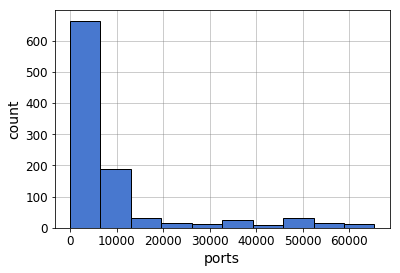

In [9]:
# 绘图
conn_df[tcp]['id.resp_p'].hist()

# 端口 - 访问次数
plt.xlabel('ports')
plt.ylabel('count')

In [10]:
# 读取http日志文件
http_df = LogToDataFrame('mylog/http.log')

# 列字段、类型
http_df.dtypes

Successfully monitoring D:/Study/A/ns-0x12/mylog/http.log...


host                 object
id.orig_h            object
id.orig_p             int64
id.resp_h            object
id.resp_p             int64
info_code             int64
info_msg             object
method               object
orig_filenames       object
orig_fuids           object
orig_mime_types      object
password             object
proxied              object
referrer             object
request_body_len      int64
resp_filenames       object
resp_fuids           object
resp_mime_types      object
response_body_len     int64
status_code           int64
status_msg           object
tags                 object
trans_depth           int64
uid                  object
uri                  object
user_agent           object
username             object
version              object
dtype: object

In [11]:
# 选择部分列输出
# 只有一个记录orz
http_df[['id.orig_h', 'id.resp_p', 'method', 'status_code', 'uri']]

,id.orig_h,id.resp_p,method,status_code,uri
ts,,,,,
2018-12-23 22:32:03.726236,10.0.2.19,80,GET,200,"/?q=""><script>alert(1)</script>"


In [12]:
# 读取ssh日志文件
ssh_df = LogToDataFrame('mylog/ssh.log')

# 输出所有（只有两个记录）
# 从 auth_success 字段看出都没有成功连接
ssh_df

Successfully monitoring D:/Study/A/ns-0x12/mylog/ssh.log...


,auth_attempts,auth_success,cipher_alg,client,compression_alg,direction,host_key,host_key_alg,id.orig_h,id.orig_p,...,kex_alg,mac_alg,remote_location.city,remote_location.country_code,remote_location.latitude,remote_location.longitude,remote_location.region,server,uid,version
ts,,,,,,,,,,,,,,,,,,,,,
2018-12-23 22:32:29.237367,0,False,chacha20-poly1305@openssh.com,SSH-2.0-OpenSSH_7.9p1 Debian-4,none,-,-,rsa-sha2-512,10.0.2.19,35820,...,curve25519-sha256,umac-64-etm@openssh.com,-,-,0.0,0.0,-,SSH-2.0-OpenSSH_7.9p1 Debian-4,ChoLWb2fDLvpjLiTq7,2
2018-12-23 22:32:50.425913,0,False,chacha20-poly1305@openssh.com,SSH-2.0-OpenSSH_7.9p1 Debian-4,none,-,-,rsa-sha2-512,10.0.2.19,35822,...,curve25519-sha256,umac-64-etm@openssh.com,-,-,0.0,0.0,-,SSH-2.0-OpenSSH_7.9p1 Debian-4,Che1U722d8VJG3iHji,2


In [13]:
# 读取notice日志文件
# 被 bro 注意（异常/恶意）
notice_df = LogToDataFrame('mylog/notice.log')

# 列字段、类型
notice_df.dtypes

Successfully monitoring D:/Study/A/ns-0x12/mylog/notice.log...


actions                                  object
dropped                                    bool
dst                                      object
file_desc                                object
file_mime_type                           object
fuid                                     object
id.orig_h                                object
id.orig_p                                 int64
id.resp_h                                object
id.resp_p                                 int64
msg                                      object
n                                         int64
note                                     object
p                                         int64
peer_descr                               object
proto                                    object
remote_location.city                     object
remote_location.country_code             object
remote_location.latitude                float64
remote_location.longitude               float64
remote_location.region                  

In [14]:
# 输出所有
notice_df

,actions,dropped,dst,file_desc,file_mime_type,fuid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,...,proto,remote_location.city,remote_location.country_code,remote_location.latitude,remote_location.longitude,remote_location.region,src,sub,suppress_for,uid
ts,,,,,,,,,,,,,,,,,,,,,
2018-12-23 22:31:34.446107,Notice::ACTION_LOG,False,10.0.2.18,-,-,-,-,0,-,0,...,-,-,-,0.0,0.0,-,10.0.2.19,remote,01:00:00,-


In [15]:
# 通过行号获取行数据
notice_df.iloc[0]['msg']

'10.0.2.19 scanned at least 15 unique ports of host 10.0.2.18 in 0m0s'